## Example Use of $\texttt{gw_remnant}$ package

to compute remant properties of binary black hole mergers given waveform generated from various models

Contact : Tousif Islam [tislam@umassd.edu]  [tousifislam24@gmail.com] 

### Import gw_remnant

In [1]:
import sys
path_to_gwremnant = "/home/UMDAR.UMASSD.EDU/tislam/work/remnants/git/gw_remnant/"
sys.path.append(path_to_gwremnant)
import gw_remnant
from gw_remnant.gw_remnant_calculator import GWRemnantCalculator
from gw_remnant.gw_waveform_generator import GWWaveformGenerator

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
Loaded NRHybSur3dq8 model
Loaded NRSur3dq8Remnant fit.


### Generate waveforms
#### NR surrogate waveforms, BHPT surrogate waveforms and remnant properties from NRSurRemnant models

In [2]:
q=8

# generate waveforms
wf = GWWaveformGenerator(mass_ratio=q)

NRSur original time grid : [-46747.12,135.98]
BHPTSur original time grid : [-26441.34,99.52]
final common time grid : [-5000.00,49.90]


### Compute remant properties from waveforms

In [3]:
# calculate remnant properties
rnr = GWRemnantCalculator(time=wf.common_times, hdict=wf.hnr, qinput=q)
rbhpt = GWRemnantCalculator(time=wf.common_times, hdict=wf.hbhpt, qinput=q, use_filter=True)

### Print remnant properties

In [4]:
# remnant properties from BHPTNRSur1dq1e4 model
rbhpt.print_remnants()

Mass ratio : 8.000
Initial mass : 1.00000000 M
Total enery radiated : 0.01129138 M
Peak luminosity : 0.00015472 
Remnant mass : 0.98870862 M
Remnant spin (dimensionless) : 0.30434135 M
Remnant kick velocity : 0.00049565 c


In [5]:
# remnant properties from NRHybSur3dq8 model
rnr.print_remnants()

Mass ratio : 8.000
Initial mass : 1.00000000 M
Total enery radiated : 0.01041293 M
Peak luminosity : 0.00080655 
Remnant mass : 0.98958707 M
Remnant spin (dimensionless) : 0.30779207 M
Remnant kick velocity : 0.00025646 c


In [6]:
# remnant properties from NRSur3dq8Remnant model
wf.rem_sur

(0.9893060467437966,
 0.00013278234694864488,
 0.3067418420211414,
 3.8735945491860356e-05,
 0.0002758833033525864,
 2.5306102409064743e-05)

In [7]:
# peak kick velocity
rnr.peak_kick

0.00031875087803050954

### Plot energy and momentum profiles

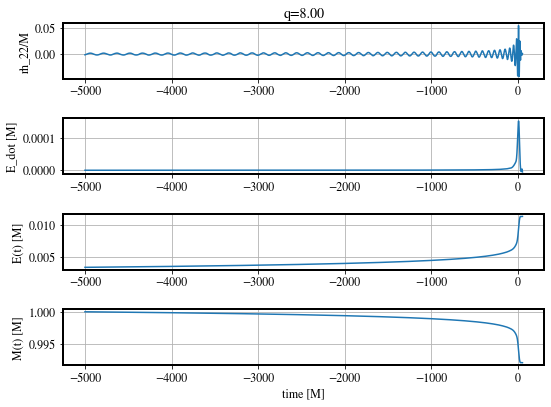

In [8]:
rbhpt.plot_mass_energy()

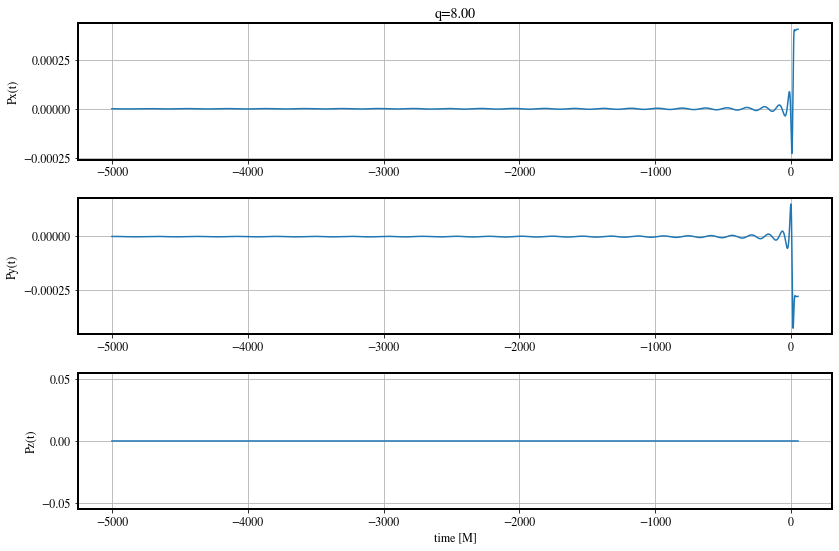

In [9]:
rbhpt.plot_linear_momentum()

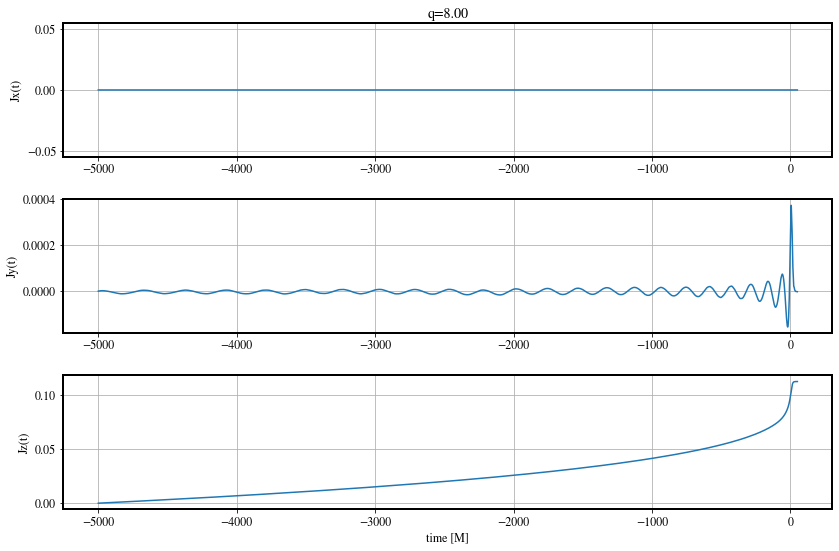

In [10]:
rbhpt.plot_angular_momentum()

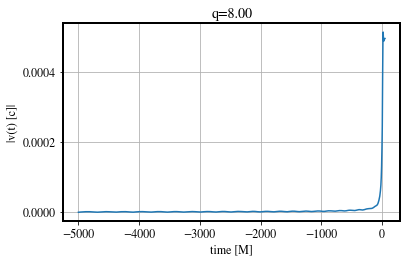

In [11]:
rbhpt.plot_kick_velocity()